# Exploration

In [10]:
using Plots
using SpecialFunctions
using Calculus
using LaTeXStrings


In [89]:
jl(l, x) = besselj(l, x)
yl(l, x) = bessely(l, x)
hl(l, x) = hankelh1(l, x)

function fl(l, p, k, a)
    j(x) = jl(l, x); j′ = derivative(j)
    h(x) = hl(l, x); h′ = derivative(h)
    term1 = p*j(k*a)*j′(p*a) - k*j′(k*a)*j(p*a)
    term2 = k*j′(k*a)*h(p*a) - p*j(k*a)*h′(p*a)
    return 1/p * term1/term2
end

function plotcomplex(x, z, label)
    p = plot(x, real(z), label=latexstring("\\Re{", label, "}"))
    p = plot!(x, imag(z), label=latexstring("\\Im{", label, "}"))
    p = plot!(x, abs.(z).^2, label=latexstring("|", label, "|^2"))
    p
end


plotcomplex (generic function with 1 method)

In [ ]:
p = range(0.01, 10, length=10000)
m = 1
a = 1
@show V₀ = 4.8^2/(2m*a^2)
# Momentum inside the well
@show k = @. √(p^2 + 2m*V₀)
l = 1
f = fl.(l, p, k, a);
δ = @. acot(1 /(f*k) + 1*im);
σl = @. sin(δ)^2/p^2;

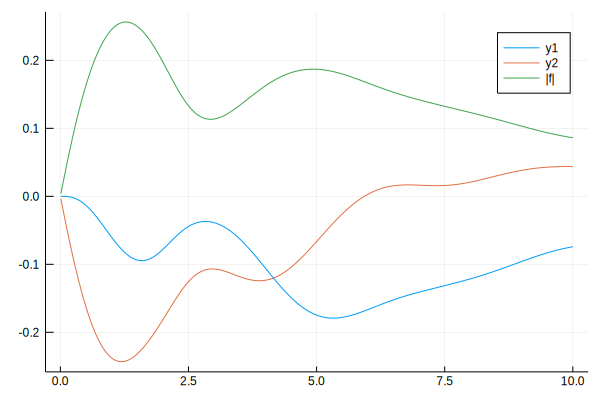

In [4]:
plot(p, real(f))
plot!(p, imag(f))
plot!(p, sqrt.(real(f).^2 + imag(f).^2), label="|f|")

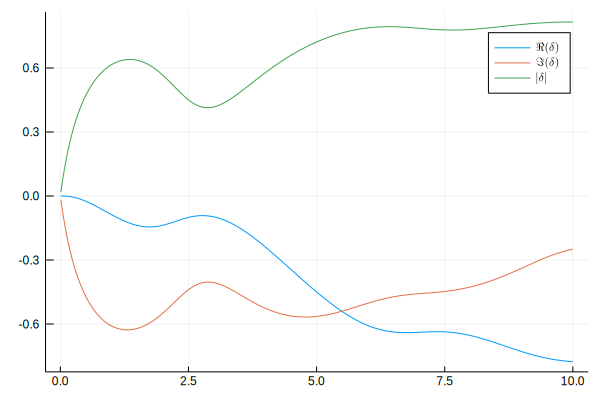

In [5]:
plot(p, real(δ) .% 2π, label=L"\Re(\delta)")
plot!(p, imag(δ) .% 2π, label=L"\Im(\delta)")
plot!(p, abs.(δ) .% 2π, label=L"|\delta|")

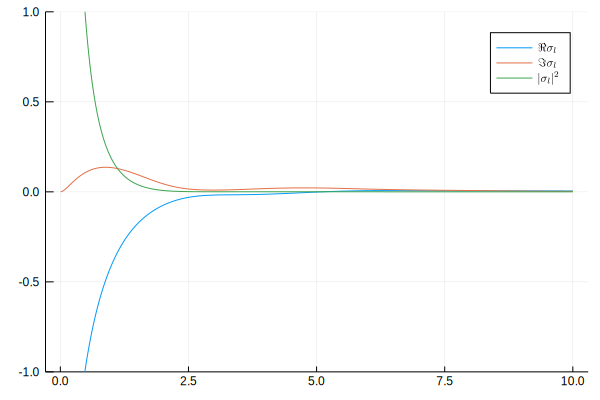

In [6]:
plot(p, real(σl), label=L"\Re{\sigma_l}")
plot!(p, imag(σl), label=L"\Im{\sigma_l}")
plot!(p, abs.(σl).^2, label=L"|\sigma_l|^2", ylim=(-1, 1))

In [ ]:
anim = @animate for a in 1:1:100
    f = fl.(l, p, k, a)
    plot(p, real(f))
    plot!(p, imag(f), ylim=(-8, 8))
end

In [ ]:
gif(anim, "/tmp/anim_fps15.gif", fps = 30)

# Hard Sphere Scattering

In [7]:
using PyCall
scipy = pyimport("scipy.special")
lpmv = scipy.lpmv

PyObject <ufunc 'lpmv'>

In [95]:
function al(l, k, a)
    # Scattering length for hard sphere
    j(x) = jl(l, x)
    h(x) = hl(l, x)
    al = -1im*j(k*a)/(k*h(k*a))
    return al
end
    
E = range(0.01, 10, length=1000)
m = 1 
# k is the wave number (should be /ħ)
p = @. √(2m*E)
# well radius
a = 1
l = 1
als = al.(l, p, a);

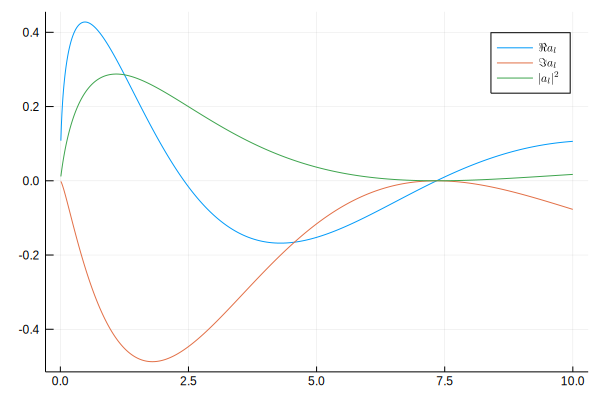

In [87]:
plot(E, real(als), label=L"\Re{a_l}")
plot!(E, imag(als), label=L"\Im{a_l}")
plot!(E, abs.(als).^2, label=L"|a_l|^2")

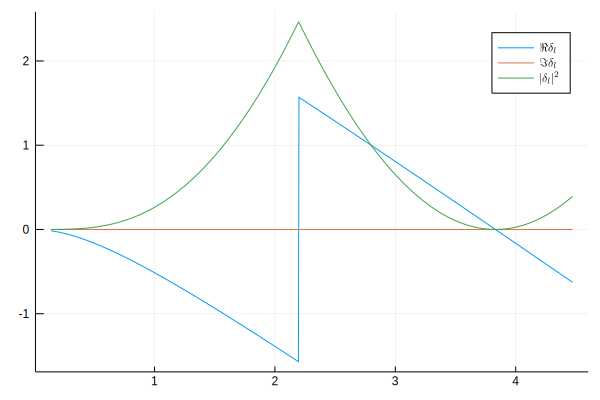

In [100]:
δl = @. atan(jl(l, p*a)/yl(l, p*a));
pl = plotcomplex(p, δl, "\\delta_l")

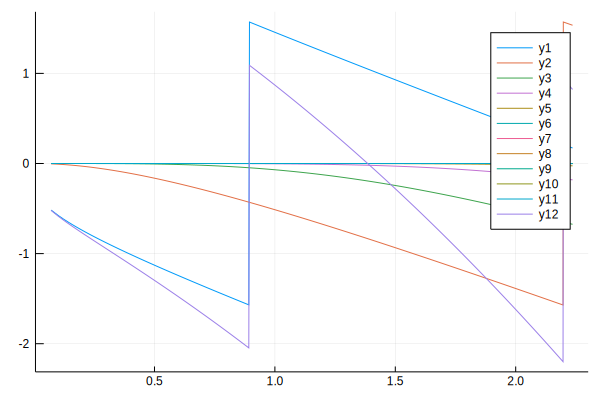

In [184]:
a = 0.5
pa = p*a
δ = zeros(size(pa))
x = pa[pa .< 0.5]
approx = zeros(size(x))
plot()
for l in 0:10
    δl = @. atan(jl(l, p*a)/ yl(l, p*a))
    #δl[pa .> π/2] .= 0
    δ += δl
    #approx += @. (2^l*factorial(l))^2/((2l+1)*factorial(2l)) * x^(2l+1)
    pl = plot!(pa, δl)
end
plot!(pa, δ)
#plot!(x, approx, ylims=(0, 5))
#plot!(p, pa)

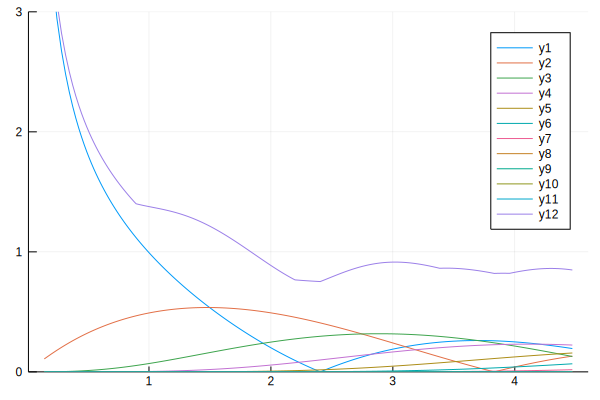

In [166]:
f = zeros(size(p))
plot()
for l in 0:10
    δl = @. abs(atan(jl(l, p*a)/yl(l, p*a))) + 2π
    fll = @. exp(1im*δl)*sin(δl)/p
    f += fll
    pl = plot!(p, abs.(fll), ylim=(0, 3))
end
pl = plot!(p, abs.(f))
display(pl)

In [ ]:
function ψ(x, y; k=1)
    r = sqrt(x^2 + y^2)
    θ = atan(y, x)
    
    S = 0
    cosθ = cos(θ)
    for l in 0:5
        S += (1im)^(l+1)*(2l+1)*al(l, k, 1)*hl(l, k*r)*lpmv(0, l, cosθ) 
    end
    return k*S
end

r = range(0.1, 20, length=100)
θ = range(0, 2π, length=100)
x = r.*cos.(θ) |> sort
y = r.*sin.(θ) |> sort
T = range(0, 1, length=100)
pyplot(leg=false, ticks=nothing) #change to the pyplot backend and define some defaults
function Ψ(x, y, t)
    value = real(exp(-1im*2π*t) * ψ(x, y))
    if abs(value) > 3
        0.0
    else
        value
    end
end
psi = Ψ.(x, y, t)
#@gif for t in T
    plot(x, y, (x, y) -> Ψ(x, y, 1), st=:surface, clim=(-3, 3))
#end

In [ ]:
function meshgrid(x, y)
    N = size(x)[1]
    M = size(y)[1]
    X = repeat(transpose(x), M, 1)
    Y = repeat(y, 1, N)
    X, Y
end

In [ ]:
X, Y = meshgrid(x, y)
psi = [Ψ.(X, Y, t) for t in range(0, 1, length=100)]

@gif for i in 1:100
    plot(x, y, psi[i], st=:surface, clims=(-1, 1), zlims=(-1, 1))
end

In [25]:
t = 1
latexstring("\\Re{", t, "}")

L"$\Re{1}$"

In [147]:
?abs

search: abs abs2 abspath AbstractSet AbstractRGB abstract type AbstractChar



```
abs(x)
```

The absolute value of `x`.

When `abs` is applied to signed integers, overflow may occur, resulting in the return of a negative value. This overflow occurs only when `abs` is applied to the minimum representable value of a signed integer. That is, when `x == typemin(typeof(x))`, `abs(x) == x < 0`, not `-x` as might be expected.

# Examples

```jldoctest
julia> abs(-3)
3

julia> abs(1 + im)
1.4142135623730951

julia> abs(typemin(Int64))
-9223372036854775808
```


# Yukawa Potential